In [111]:
# Packages used in Descriptive analysis
import pandas as pd
import numpy as np 
import json
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from collections import defaultdict
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import stop_words
import string

# For prediction/ Machine learning
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from matplotlib import pyplot 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.model_selection import cross_val_predict,KFold

### Table of content  
1.[Descriptive analysis](#Descriptive-analysis):  
2.[Predictive analysis](#Predictive-analysis):  

# Introduction
This notebook is split in two parts: 1) Descriptive analysis 2) Predictive analysis.  
In the descriptive analysis part the question of "what makes a business open or close?" will be investigated. Here the role of location and business category will be investigated alongside the role of two KPI's: review count and star rating.

In the predictive analysis part predictive modelling will be done on the same two KPI's since it is in the interest of the business owner to increase both of these factors. 

## Setup 1: Load Json file

This notebook will focus on the business aspect of the yelp data sets and therefore only makes use of the
-  yelp_academic_dataset_business.json' file

In [58]:
df_yelp = pd.read_json('yelp_academic_dataset_business.json',lines=True)
pd.options.display.max_colwidth = 300

In [59]:
df_yelp.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikeParking': 'True', 'GoodForKids': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'ByAppointmentOnly': 'False', 'RestaurantsPriceRange2': '3'}","Active Life, Gun/Rifle Ranges, Guns & Ammo, Shopping","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0', 'Wednesday': '10:0-18:0', 'Thursday': '11:0-20:0', 'Friday': '11:0-20:0', 'Saturday': '11:0-20:0', 'Sunday': '13:0-18:0'}"
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': 'True'}","Health & Medical, Fitness & Instruction, Yoga, Active Life, Pilates",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppointmentOnly': 'False', 'DogsAllowed': 'True', 'BikeParking': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'RestaurantsPriceRange2': '4'}","Hardware Stores, Home Services, Building Supplies, Home & Garden, Shopping","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', 'Wednesday': '7:0-16:0', 'Thursday': '7:0-16:0', 'Friday': '7:0-16:0'}"
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppointmentOnly': 'True'}","Home Services, Plumbing, Electricians, Handyman, Contractors","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', 'Wednesday': '9:0-16:0', 'Thursday': '9:0-16:0', 'Friday': '9:0-16:0'}"


## Setup 2: Functions used

Below are some of the function defined for use in the descriptive analysis part of the notebook.

#### Text processing function

In [60]:
lemmatizer = WordNetLemmatizer()
def text_processing(text):
    '''
    This function is a Text preprocessing function taken from the lectures,
    The function is used to make all words lower case and remove different symbols e.g &.
    '''
    
    if text == None:
        return None
    if type(text) == float:
        return None
    # remove punctuation 
    text = "".join([c for c in text if c not in string.punctuation])
    # Uppercase
    text = "".join([c.lower() for c in text])
    # remove stopwords
    text = " ".join([w for w in text.split() 
                     if w not in stop_words.ENGLISH_STOP_WORDS])
    return text

#### First Category function


In [61]:
def most_freq_cat(df):
    '''
    This function takes in a dataframe and outputs the same dataframe with an extra column. 
    The column consists of the first description of the category.
    '''
    
    # Finding column for categories
    col = np.where('categories' == df.columns)[0]
    col = int(col[0])
    
    df['first_cat'] = df.categories
    col2 = np.where('first_cat' == df.columns)[0]
    # The for loop choses the first description of the categories column
    for i in range(len(df)):
        if df.iloc[i,col] == None:
            continue
        df.iloc[i,col2] = df.iloc[i,col].split(',', 1)[0]
        
    # Apply text preprocessing to the (first) categories
    df.loc[:,'first_cat'] = df.first_cat.apply(text_processing)
    
    # Make a new column with only the first category description
#     df.loc[:,'first_cat'] = df.categories
    return df

## Setup 3: Looking at the state of NC (North Carolina) and the city of Charlotte.

The file is very comprehensive and for the purporses of this notebook we will focus our attention on one state. 
In this case we focus on the state of North Carolina but the methods used can be applied to any state.

In [62]:
df_NC = df_yelp[df_yelp['state']=='NC']

 ### Setup 3.1 Number of businesses per city
First we will look at the number of businesses per city to get an overview of the distribution of businesses in the state of North Carolina.

In [63]:
sns.set(style="darkgrid")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

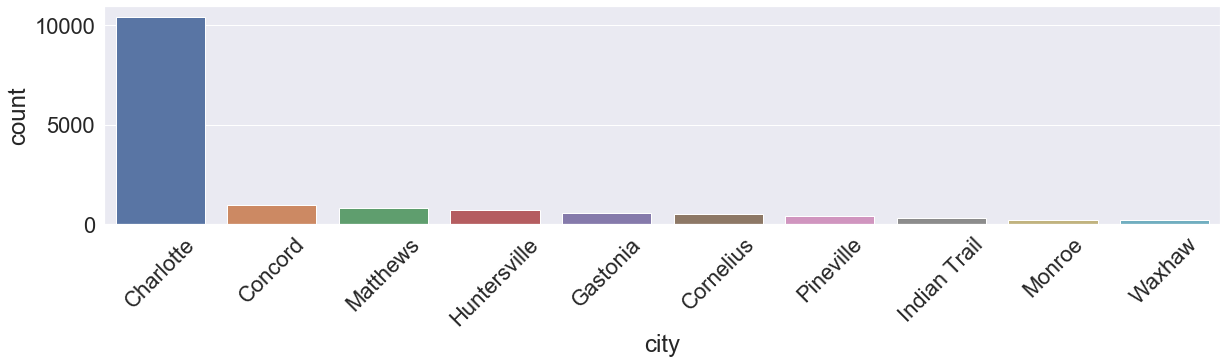

In [64]:
plt.figure(figsize=(20,4))
sns.set(font_scale=2)

sns.countplot(x="city",data=df_NC, order = df_NC['city'].value_counts()[:10].index)
plt.xticks(rotation = 45)

It seems that Charlotte is the city where most of the businesses are concentrated. We will therefore concentrate our focus on the city of Charlotte for the rest of this notebook.

In [65]:
df_Charlotte = df_NC[df_NC['city']=="Charlotte"].copy()

# *Descriptive analysis*

# Part 1: What makes a business open or close ? 

In this part we will analyse what factors influence whether a business closes or opens, in the city of Charlotte.
The reason this is interesting is because the **is_open** column of the dataset is the closest measure to success that is present in the dataset.

One might argue that rating would be a better measure since a higher rating is often associated with a better business. The counter argument here is that: it is possible to have a good business with a somewhat low rating, but it is not possible to have a good business that is closed down. 

## Charlotte
## 1.1 What are the properties of all businesses?
First we investigate some of the properties of ALL businesses in Charlotte to get some idea of what relevant features and factors might be in relation to whether a business stays closed or open.

### 1.1.1 How many of the businesses are open ?

It is a good idea to always have a prior distribution of the variable one is investigating.
Furthermore the ratio of open businesses to closed businesses is an important factor for an investor when looking to invest in a business in a given city. If the city is in an economic recession this may manifest itself as a high number of closed businesses.

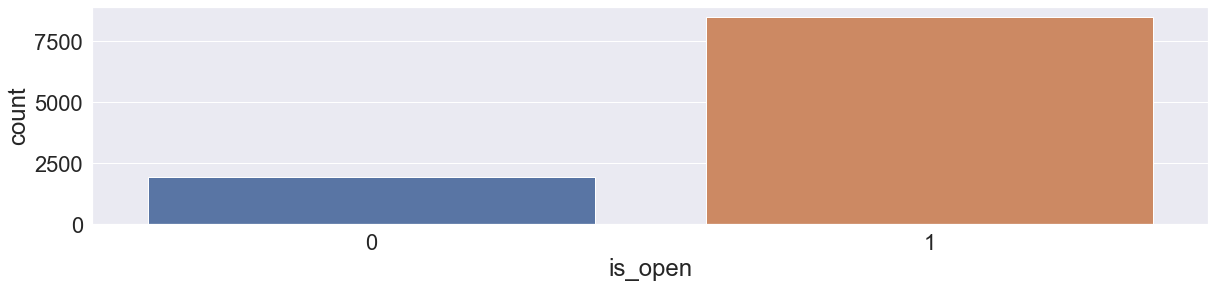

In [66]:
plt.figure(figsize=(20,4))
sns.set(font_scale=2)
sns.countplot(x = 'is_open',data = df_Charlotte)
# Barplot instead of histogram 

#### Conclusion
It can be seen that around 80% of the businesses in Charlotte are open. This ratio will not be compared to different cities.

### 1.1.2 How does the distribution of businesses look on a map of Charlotte?

We will plot the city of Charlotte on the map, where the color coding is related to whether the individual businesses are **open or closed**. This is to see if there is a very apparent connection between business "openess" and location.

This is done using the scatter_mapbox from the plotly library.

In [67]:
fig = px.scatter_mapbox(df_Charlotte, lat="latitude", lon="longitude", hover_name="review_count", #hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=9, color="is_open",height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Conclusion
It doesn't seem that there is a specific pattern of business which are open or closed. This does not mean that there is no 
correlation though. The correlation between whether a business is open and location will be checked later on in the notebook.

Next we will plot the city of Charlotte on the map, where the color coding is related to the **number of stars** of the individual businesses. This is to see if location plays a role in the rating of businesses.

In [68]:
fig = px.scatter_mapbox(df_Charlotte, lat="latitude", lon="longitude", #hover_name="", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=9, color="stars",height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Conclusion
There is no clear pattern of the rating distribution of businesses. 

### 1.1.3 What is the general rating of businesses in Charlotte?

The general distribution of the rating of businesses in Charlotte is shown below. 
It could be that the rating given to a business influences whether that business remains open or gets closed.

Mean rating for businesses in Charlotte:  3.492896227320726


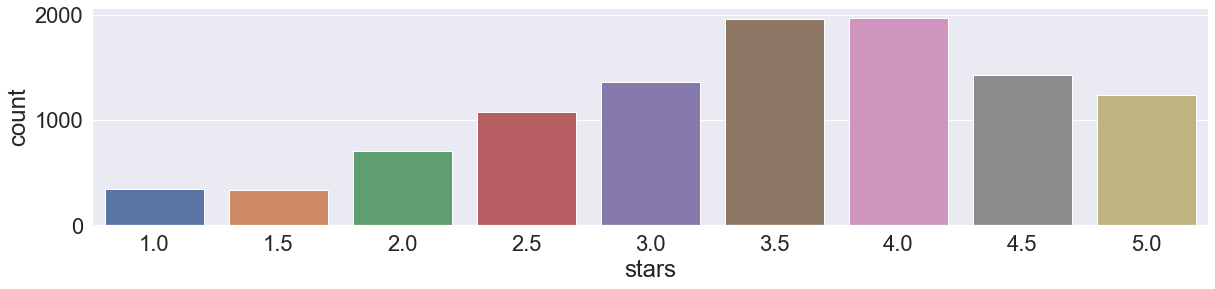

In [69]:
plt.figure(figsize=(20,4))
sns.set(font_scale=2)
sns.countplot(x = 'stars',data = df_Charlotte)
avg_rating = df_Charlotte.stars.mean()
print("Mean rating for businesses in Charlotte: ", avg_rating)



### 1.1.4 How many reviews do businesses get?

This might be an important feature since businesses with a high review count will probably also have a high number of customers 

The Median/Mean review count of open businesses in Charlotte are: 10.00,35.65 )


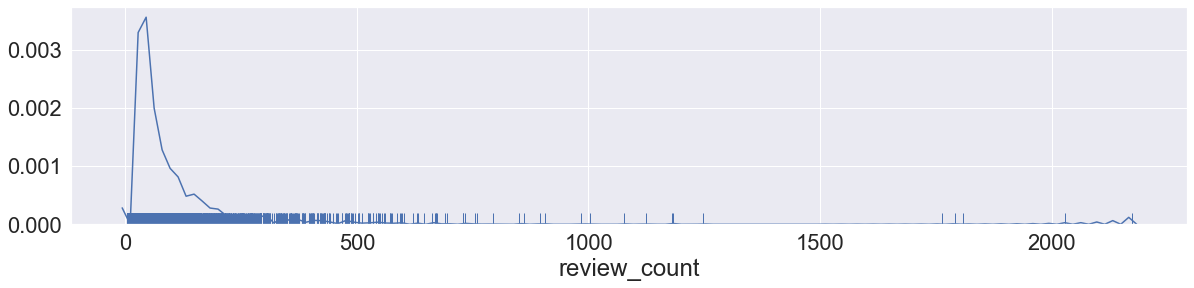

In [70]:
plt.figure(figsize=(20,4))
sns.set(font_scale=2)
x = df_Charlotte['review_count']
sns.distplot(x, kde=True, rug=True, bins = 100,hist = False);
# sns.countplot(x = 'review_count',data = df_Charlotte,facecolor=(0, 0, 0, 0))
median_review = df_Charlotte.review_count.median()
mean_review = df_Charlotte.review_count.mean()
print("The Median/Mean review count of open businesses in Charlotte are: %.2f,%.2f )" %(median_review,mean_review))

#### Conclusion 
The average number of reviews for businesses is 35 and the median is 10

### 1.1.5 What are the most frequent business types in Charlotte?

The frequency of the business categories is also very important for an investor looking to open up a business in the city. It might for example not be a very good idea to open up a hair salon if the city is very saturated with hair salons.

Furthermore it could be interesting to see whether this distribution varies between open and closed businesses. Some business categories might be doing better in the city than others. 
This will be investigated later on in the notebook.

A challenge when trying to analyse the business categories is that there are a lot of different category tags associated with every business. 

There are different ways to go about this issue. A simple approach is to use the first category description of each business from the category column and count them; with the assumption that the first description is the most "descriptive" description. This is done using the *most_freq_cat* function. 

In [71]:
df_Charlotte_freq = most_freq_cat(df_Charlotte)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

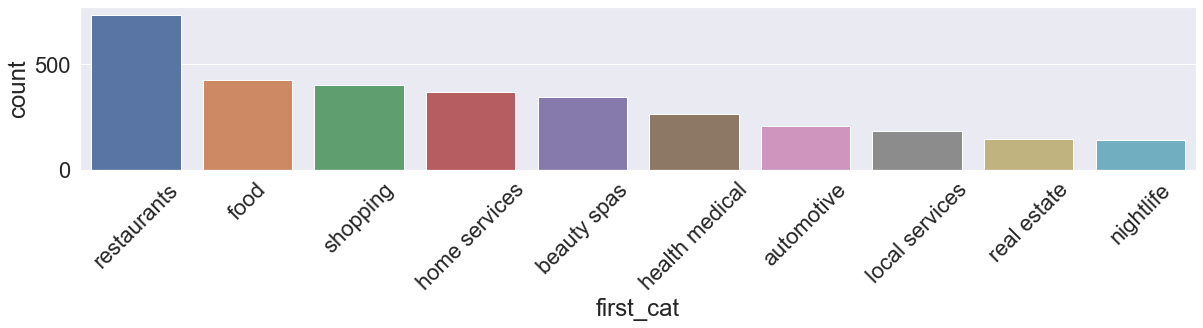

In [72]:
plt.figure(figsize=(20,3))
sns.set(font_scale=2)
sns.countplot(x='first_cat',data = df_Charlotte_freq, order = df_Charlotte['first_cat'].value_counts()[:10].index)
plt.xticks(rotation = 45)

#### Conclusion
Restaurants and food seem to be very popular categories in Charlotte.

### Is it possible to divide the categories into different industries?

### Topic modelling
Another method to assess the different types of businesses, would be to use topic modelling. This would allow similar businesses to be bundled together under a topic. This could be useful for rating an 'industry' instead of specific business categories e.g the food industry, the beauty industry and the entertainment industry instead of restaurant, hair salon and theater.  
The is done using LDA which identifies patterns between words in different documents. In this case each document is a business category tag list.


In [73]:
# Below Topic modelling methods are taken from a lecture of the course Advanced Business Analytics, at DTU.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow_counts = count_vect.fit_transform(df_Charlotte_freq['categories'].dropna().values)
# print(bow_counts)

In [74]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10

lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [75]:
X_lda = lda.fit_transform(bow_counts)

In [76]:
#Print top N words together with their weights in each topic
def print_top_words(model, feature_names, n_top_words):
    norm = model.components_.sum(axis=1)[:, np.newaxis]
    for topic_idx, topic in enumerate(model.components_):
        print(80 * "-")
        print("Topic {}".format(topic_idx))
        for i in topic.argsort()[:-n_top_words - 1:-1]:
            print("{:.3f}".format(topic[i] / norm[topic_idx][0]) 
                  + '\t' + feature_names[i])

In [77]:
print("\nTopics in LDA model:")
counts_feature_names = count_vect.get_feature_names()
n_top_words = 10
print_top_words(lda, counts_feature_names, n_top_words)


Topics in LDA model:
--------------------------------------------------------------------------------
Topic 0
0.131	automotive
0.107	repair
0.104	auto
0.054	stations
0.046	car
0.029	dealers
0.028	supplies
0.028	stores
0.028	tires
0.025	change
--------------------------------------------------------------------------------
Topic 1
0.181	bars
0.126	nightlife
0.093	hotels
0.068	travel
0.046	wine
0.037	beer
0.028	sports
0.026	spirits
0.020	entertainment
0.018	food
--------------------------------------------------------------------------------
Topic 2
0.160	medical
0.135	health
0.094	dentists
0.052	doctors
0.043	cosmetic
0.042	chinese
0.041	general
0.038	dentistry
0.035	law
0.023	surgeons
--------------------------------------------------------------------------------
Topic 3
0.118	shopping
0.078	stores
0.074	home
0.062	pet
0.062	fashion
0.048	garden
0.045	clothing
0.037	services
0.028	pets
0.025	furniture
--------------------------------------------------------------------------------
To

#### Conclusion
The topic modelling seems to be working fairly well. It seems to bundle the businesses fairly well together into coherent industries. With that said, for the kind of analysis that will be done in this notebook the *first category* method will be sufficient. But if someone wanted to do an even more comprehensive analysis of the business categories, topic modelling could be a viable option.

## 1.2 What are the properties of successfull (open) businesses ?

The analysis for all businesses has given us an idea of what important features to analyse might be.

Our attention will now go to the open businesses of Charlotte, with the assumption stated in the beginning of this notebook; that open businesses are also successfull businesses. This is of course a very harsh and unprecise assumption, never the less it is the best target variable at our disposal.

We will explore the ratings, number of reviews and the business type distributions for open businesses. And compare these distributions with the distributions for closed businesses, which we will look into further along the notebook. 

In [78]:
df_open = df_Charlotte[df_Charlotte['is_open']==1].copy()

In [79]:
df_open = most_freq_cat(df_open)

### 1.2.1 What is the rating of open businesses?

Mean rating for open businesses:  3.5110064743967038


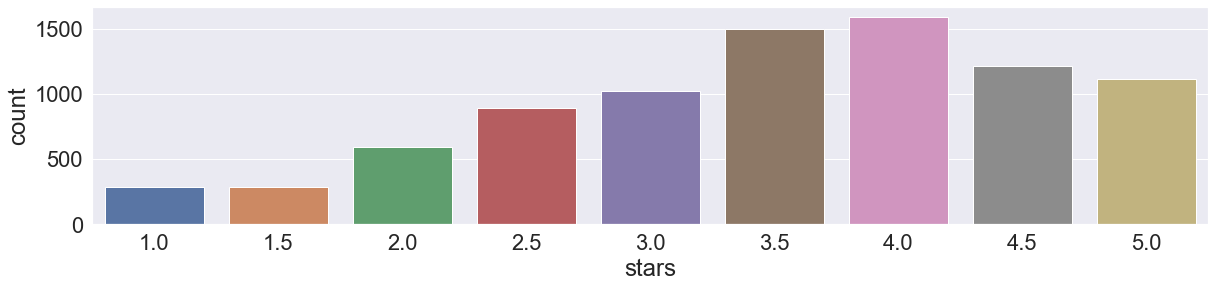

In [80]:
plt.figure(figsize=(20,4))
sns.set(font_scale=2)
sns.countplot(x = 'stars',data = df_open)
avg_rating = df_open.stars.mean()
print("Mean rating for open businesses: ", avg_rating)

### 1.2.2 How many reviews do open businesses get?

The Median/Mean review count of open businesses in Charlotte are: 10.00,37.87 )


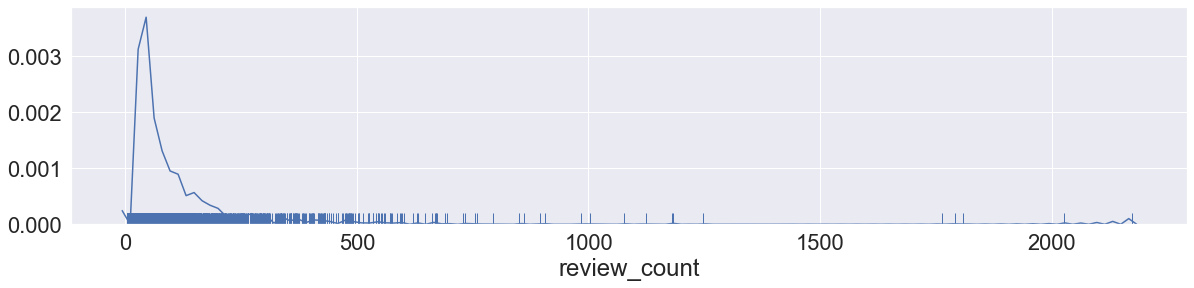

In [81]:
plt.figure(figsize=(20,4))
sns.set(font_scale=2)
sns.distplot(df_open.review_count,kde=True, rug=True, bins = 100,hist = False)
median_review = df_open.review_count.median()
mean_review = df_open.review_count.mean()
print("The Median/Mean review count of open businesses in Charlotte are: %.2f,%.2f )" %(median_review,mean_review))

### 1.2.3 What are the most frequent business types for open businesses?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

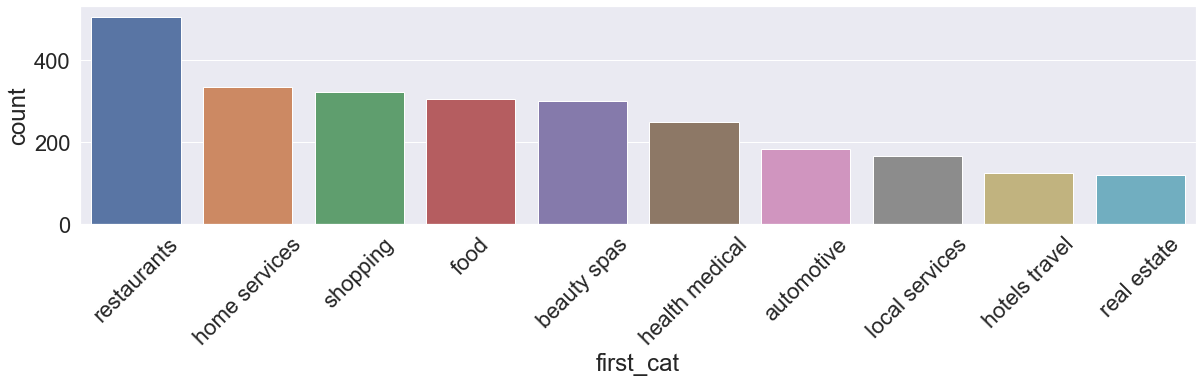

In [82]:
plt.figure(figsize=(20,4))
sns.set(font_scale=2)
sns.countplot(x='first_cat',data = df_open, order = df_open['first_cat'].value_counts()[:10].index)
plt.xticks(rotation = 45)

## 1.3 What are the properties of bad (closed) businesses?

Now we look into the same properties but for closed businesses, and compare with the open businesses.

In [83]:
df_closed = df_Charlotte[df_Charlotte['is_open']==0].copy()

In [84]:
df_closed = most_freq_cat(df_closed)

### 1.3.1 What is the rating of closed businesses?

Mean rating for closed businesses:  3.412851196670135


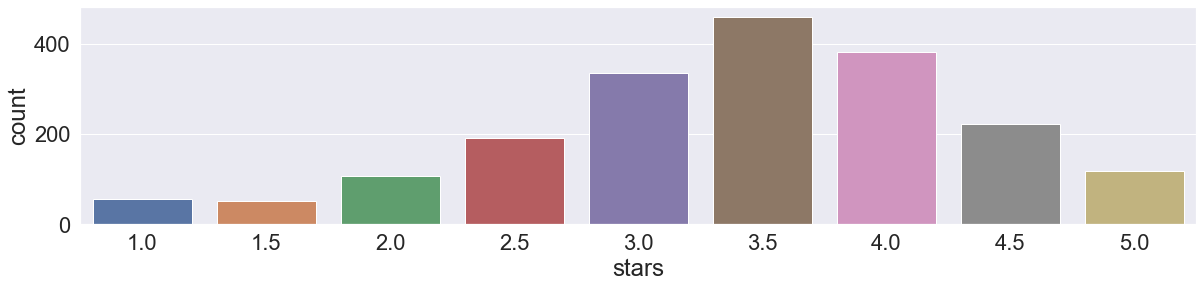

In [85]:
plt.figure(figsize=(20,4))
sns.set(font_scale=2)
sns.countplot(x = 'stars',data = df_closed)
avg_rating = df_closed.stars.mean()
print("Mean rating for closed businesses: ", avg_rating)
# Check if this rating is significant

#### Conclusion
There is a difference of 0.1 (from 3.51 for open businesses to 3.41 for closed businesses) between the average rating of open and closed businesses. This is a drop of around 3%. This might suggest that the 'rating' of a business, has somewhat of an influence in whether a business is closed or stays open; though probably not a very large one. This challenges our initial intuition that "good" business has significantly better ratings than "bad" businesses. This simply doesn't seem to be the case.

There could be several reasons for this.
One idea is that, as a business becomes more popular and mainstream (in other words successfull), it also receives more resistance and critic. This will manifest itself as a subpar rating. It is for example very rare to find a very famous and popular restaurant with a perfect 5 star average. 
This will often not be the case for small businesses that hold only a few reviews. Here it is much more likely that the few reviews they did get are very good e.g reviews they get from friends or family. This will therefore result in a lot of small businesses with good averages; and in turn even out the rating gap between good and bad businesses that otherwise would have occurred.

### 1.3.2 How many reviews do closed businesses get?

The Median/Mean review count of closed businesses in Charlotte are: 8.50,25.82 )


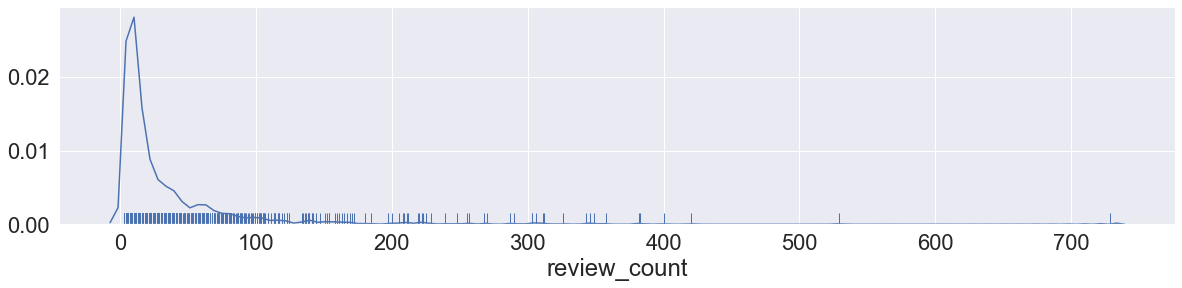

In [86]:
plt.figure(figsize=(20,4))
sns.set(font_scale=2)
sns.distplot(df_closed.review_count, kde=True, rug=True, bins = 100,hist = False);
median_review = df_closed.review_count.median()
mean_review = df_closed.review_count.mean()
print("The Median/Mean review count of closed businesses in Charlotte are: %.2f,%.2f )" %(median_review,mean_review))

#### Conclusion
The median review count is 15% smaller (from 10 to 8.5) for closed businesses compared to open businesses.
The mean review count is around 32 % smaller (from 37.87 to 25.82) for closed business compared to open businesses.
This suggests that the number of reviews could have a significant influence on whether or not a business stays open or is closed.
From the above 2 descriptions it would seem that the quantity of the review is more important than the quality/rating of the review. The saying that "all advertisement is good advertisement" might actually be true.

### 1.3.3 What are the most frequent business types for closed businesses?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

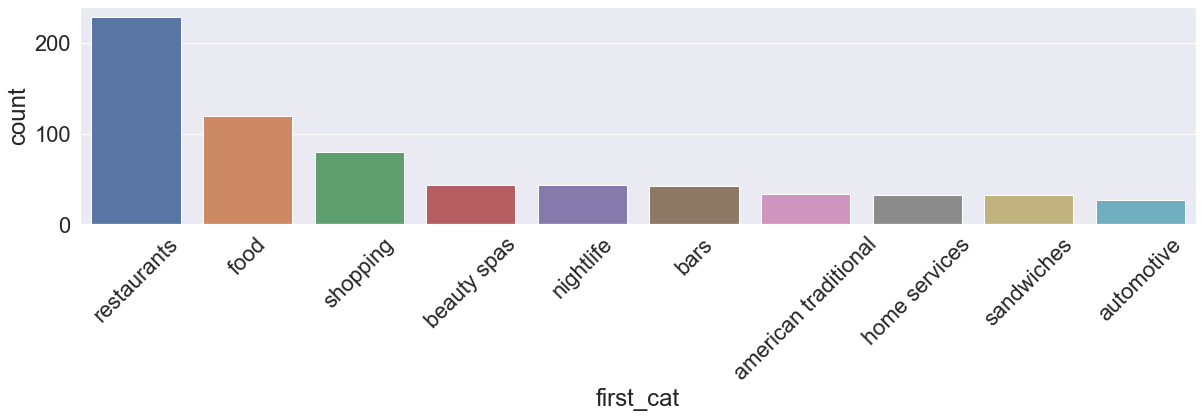

In [87]:
plt.figure(figsize=(20,4))
sns.set(font_scale=2)
sns.countplot(x='first_cat',data = df_closed, order = df_closed['first_cat'].value_counts()[:10].index)
plt.xticks(rotation = 45)

### Conclusion
When looking at the category distributions for open and closed businesses one thing in particular stands out; that is the category of home services. It can be seen that this is the second most popular business category for open business while only being the 9'th most popular business category for closed businesses.

There are other differences also but the above mentioned difference is the most appararent and seems the most significant for predictive purposes.

## 1.4 Is location correlated with the success of a business?

Since it is difficult to observe from the map shown in the beginning of the notebook whether or not location plays a role in how the business is doing (the openness of the business), a chi squared significance test will be done - with a test statistic of 95% - of whether location and openness are correlated.

In [88]:
# Below idea and snippets is taken from https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
from scipy.stats import chi2_contingency
from scipy.stats import chi2
pd.set_option('display.max_columns', None)

Contingency table

In [89]:
df = df_Charlotte.loc[:,['is_open','postal_code']].copy()

In [90]:
cont_table = pd.crosstab(df_Charlotte['is_open'],df_Charlotte['postal_code'],margins = False)
cont_table.head()

postal_code,,06106,21211,23231,28016,28025,28026,28027,28031,28036,28037,28075,28078,28079,28104,28105,28112,28120,28127,28134,28173,28201,282010,28202,28203,28204,28205,28206,28207,28208,28209,28210,28211,28212,28213,28214,28215,28216,28217,28219,28220,28221,28223,28224,28225,28226,28227,28229,28231,28233,28234,28236,28244,28246,28247,28251,28253,28255,28256,28262,28263,28266,28269,28270,28271,28272,28273,28274,28277,28278,28280,28281,28282,28284,28285,28288,28297,28299,28501,28720,29203,30101,60657
is_open,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,0,0,1,0,0,1,0,1,0,0,0,2,0,0,3,0,0,0,3,0,2,0,219,172,80,151,32,22,46,100,67,93,49,55,13,8,49,88,0,0,0,0,0,0,51,43,0,1,1,0,0,2,4,0,0,1,2,0,107,18,2,70,45,0,0,99,0,191,8,7,0,1,1,2,5,0,0,0,1,0,0,0
1,21,1,1,0,1,1,0,2,1,1,1,1,5,1,2,26,1,2,1,6,2,10,1,582,530,324,565,189,118,412,397,310,414,174,241,115,118,312,487,3,1,1,6,1,1,316,219,1,0,1,1,1,6,5,2,1,0,0,2,470,18,2,363,146,4,3,505,1,875,129,14,2,4,1,4,2,2,2,1,0,1,1,1


In [91]:
stat, p, dof, expected = chi2_contingency(cont_table)

In [92]:
# interpret p-value
prob = 0.95
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.000
Dependent (reject H0)


It can be concluded that whether or not a business is open **does** depend on location.

# Part 1: Main conclusion and findings

For an investor looking to invest in the city of Charlotte different parameters may be of importance.
- **Rating** : Rating might actually not be as important a factor as one would have imagined, displaying only a 3% difference between open and closed businesses.
- **Review count**: Review count seems to be a more important factor, when looking to invest in a business, with differences between 15% and 32%, depending on looking at the median or the mean values.
- **Location (postal code)**: The location of the business was also tested to be significantly correlated with the success of the business in terms of openness.
- **Category**: The category of *home services* seems to be doing well in this city, and is a very popular choice among open businesses.
- **Topic Modelling**: If an investor is looking to invest in certain industries instead of specific businesses, topic modelling seems to be a good option as a base for analysis.

# *Predictive analysis*

In this part of the notebook predictive analysis will be performed on the two KPI's: *review count* and *star rating*.  
    
For the predictive analysis in this notebook the business category of **Restaurants** will be the main focus. 
We will look at how the factors described in the descriptive analysis of this notebook along other attributes, will perform in predicting the **star rating** and **review count** of restaurants in Charlotte. Futhermore feature importance analysis will also be performed.   

The idea is that this will be usefull for a restaurant owner because he/she can use the information to improve these two KPI's.  


### Looking at attributes

Here the *attributes* column of the dataset is used, to do some predictive modelling.

In [93]:
df_att = df_Charlotte['attributes'].apply(pd.Series)

In [94]:
pd.set_option('display.max_columns', 40)
df_att.head(2)

,RestaurantsGoodForGroups,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsTakeOut,GoodForKids,BusinessParking,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsAttire,Ambience,HasTV,RestaurantsDelivery,Alcohol,BikeParking,WiFi,NoiseLevel,Caters,ByAppointmentOnly,DogsAllowed,BusinessAcceptsBitcoin,HappyHour,GoodForMeal,WheelchairAccessible,AcceptsInsurance,GoodForDancing,Smoking,RestaurantsTableService,BYOBCorkage,Music,BestNights,CoatCheck,DriveThru,BYOB,HairSpecializesIn,Corkage,DietaryRestrictions,AgesAllowed,Open24Hours
20,True,False,True,True,True,"{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",1,False,u'casual',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Taking what are assumed to be important attributes for customers when rating a business. These include:
- GoodForKids, RestaurantsPriceRange2, RestaurantsReservations, WiFi

In [95]:
df_att = df_att.iloc[:,[4,6,7,14]].copy()

# Part 2: Prediction of rating of Restaurants
The purpose here is to build a classifier that can predict the **star rating** of a restaurant, given certain features.
  
This is done using the features: 
- is_open, review_count, GoodForKids, RestaurantsPriceRange2, RestaurantsReservations, WiFi

First we should get an idea of the distribution of the data

### Preprocessing

Removing all other categories exept food and restaurant since these are the business categories we are investigating in this predictive analysis

In [134]:
# Business features
df_rest = df_Charlotte.loc[:,['stars','is_open','review_count','first_cat']].copy() 

# Attritubes features
frame = [df_rest,df_att]
df_rest = pd.concat(frame,axis=1)

# Removing all categories except restaurants and food
df_rest = df_rest[(df_rest.first_cat =='restaurants') | (df_rest.first_cat == 'food')]

Since we are only looking at restaurants/ food categories. The column becomes unnecessary to include.

In [135]:
df_rest = df_rest.drop(['first_cat'],axis=1).copy()

Splitting dataset in features and target

In [136]:
y = df_rest.loc[:, 'stars']
X = df_rest.drop('stars',axis=1)

Preprocessing the columns such that they have acceptable values for predictive modelling

In [137]:
X.WiFi.replace({"u'free'": True,"'free'":True,"u'paid'": True, "'paid'": True,"u'no'":False,"'no'":False, "None":False}, inplace=True)
X.GoodForKids.replace({"True":True,"False":False,'None': False}, inplace=True)
X.RestaurantsReservations.replace({'False': False, 'True':True, 'None': False}, inplace=True)
X.RestaurantsPriceRange2.replace({'1':1,'2':2,'3':3,'4':4,'None': 2 }, inplace=True)
        

In [138]:
print("Mean value of the Resturant price range", X.RestaurantsPriceRange2.mean())

Mean value of the Resturant price range 1.545


#### Dealing with NaN values

The different attributes all have different amount of NaN values, and removing all rows with NaN values would not be a feasible solution. 
We will deal with the NaN values in different ways for the different feature columns.
- **GoodForKids**: NaN values to False
- **RestaurantsPriceRange2**: NaN values to nearest integer of the mean value
- **WiFi**: NaN values to No
- **RestaurantsReservations**: NaN values to False

In [139]:
X.RestaurantsPriceRange2.fillna(2,inplace=True)
X.GoodForKids.fillna(False,inplace=True)
X.WiFi.fillna(False,inplace=True)
X.RestaurantsReservations.fillna(False,inplace=True)

In [140]:
X

,is_open,review_count,GoodForKids,RestaurantsPriceRange2,RestaurantsReservations,WiFi
20,0,5,True,1.0,False,False
122,0,8,True,2.0,True,False
283,1,18,True,1.0,False,False
288,0,124,True,2.0,True,True
401,1,1077,False,2.0,False,False
...,...,...,...,...,...,...
208522,0,34,True,1.0,False,False
208590,1,61,True,1.0,False,False
208605,1,30,False,2.0,False,False
209292,0,88,True,1.0,False,True


Standardize the *review count* column while leaving the categorical columns as they are.

In [141]:
column_trans = make_column_transformer((StandardScaler(),['review_count']),remainder = 'passthrough',sparse_threshold=0)
X = column_trans.fit_transform(X)

C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



In [142]:
print('y: ', y)

y:  20        3.0
122       4.0
283       1.5
288       3.5
401       4.0
         ... 
208522    3.0
208590    1.5
208605    4.0
209292    2.0
209385    2.0
Name: stars, Length: 1159, dtype: float64


On first glance the target (stars rating) variable might seem continuous but actually it only contains a discrete number of stars and is therefore more suited as a categorical target variable.

In [143]:
# from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

### Testing Classifiers
Now different classifiers will be tested, to see which performs the best for our dataset.

Split data in train and test set

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

#### Baseline model
In this model we predict the **average** rating of the stars (rounded to nearest semi decimal). Since performance is a relative thing it is always usefull to have a naive baseline model to compare other classifiers with.

In [145]:
# warnings.filterwarnings('ignore', category=UndefinedMetricWarning) 

y_pred = y_test.mean().round()*np.ones(len(y_test))
target_names = ['1','1.5','2','2.5','3','3.5','4','4.5','5']
acc_score = accuracy_score(y_test,y_pred)


print("Accuracy: ", acc_score.mean())
print("The Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("A Classification report: ")
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy:  0.2349869451697128
The Confusion Matrix: 
[[ 0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0 24  0  0  0]
 [ 0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0 62  0  0  0]
 [ 0  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0 89  0  0  0]
 [ 0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0 10  0  0  0]]
A Classification report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
         1.5       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        24
         2.5       0.00      0.00      0.00        43
           3       0.00      0.00      0.00        62
         3.5       0.23      1.00      0.38        90
           4       0.00      0.00      0.00        89
         4.5       0.00      0.00      0.00        53
           5       0.00      0.00      0.00        10

   micro avg       0.23      0.23      0.23       383
   macro avg       0.03      0.11      0.04       383


C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



#### LogisticRegression
Logistic regression is a classifier model that works by calculating a probability for each target category based on the feature values. It then chooses to classify to the target category with the highest probability. In this case since we are working with a multiclass problem a 'one-versus-rest' scheme is chosen. Here the classifier calculates the probability of a target category against the probability of all the other target categories. This is done for each target category.

In [146]:
model = LogisticRegression(multi_class ='ovr' ).fit(X_train,y_train)
y_pred = model.predict(X_test)
# y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
target_names = ['1','1.5','2','2.5','3','3.5','4','4.5','5']
acc_score = accuracy_score(y_test,y_pred)


print("Accuracy: ", acc_score.mean())
print("The Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("A Classification report: ")
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy:  0.2584856396866841
The Confusion Matrix: 
[[ 0  0  0  0  1  2  1  0  0]
 [ 0  0  0  0  0  0  5  3  0]
 [ 0  0  0  0  3  5 12  4  0]
 [ 0  0  0  0  3  9 21 10  0]
 [ 0  0  0  0 13 16 25  8  0]
 [ 0  0  0  0  6 22 47 15  0]
 [ 0  0  0  0  7 13 43 26  0]
 [ 0  0  0  0  2  6 24 21  0]
 [ 0  0  0  0  0  1  4  5  0]]
A Classification report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
         1.5       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        24
         2.5       0.00      0.00      0.00        43
           3       0.37      0.21      0.27        62
         3.5       0.30      0.24      0.27        90
           4       0.24      0.48      0.32        89
         4.5       0.23      0.40      0.29        53
           5       0.00      0.00      0.00        10

   micro avg       0.26      0.26      0.26       383
   macro avg       0.13      0.15      0.13       383


C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



#### RandomForestClassifier
The RandomForest classifier is an ensemble method that works by using many decisiontrees and classifying to the category with the most votes, meaning the category that most decision trees predicted.

In [150]:
model = RandomForestClassifier(random_state=4).fit(X_train,y_train)
y_pred = model.predict(X_test)
# y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
target_names = ['1','1.5','2','2.5','3','3.5','4','4.5','5']
acc_score = accuracy_score(y_test,y_pred)

print("Accuracy: ", acc_score)
print("The Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("A Classification report: ")
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy:  0.2402088772845953
The Confusion Matrix: 
[[ 0  0  1  1  1  1  0  0  0]
 [ 0  3  1  0  1  1  2  0  0]
 [ 0  1  4  2  3  5  5  3  1]
 [ 0  5  2  6  9 10  7  3  1]
 [ 0  3  4  7  9 14 17  4  4]
 [ 0  3  3  9 12 26 23 12  2]
 [ 0  0  2  9 15 15 35 12  1]
 [ 0  1  2  7  3 13 16  9  2]
 [ 0  0  0  3  0  2  5  0  0]]
A Classification report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
         1.5       0.19      0.38      0.25         8
           2       0.21      0.17      0.19        24
         2.5       0.14      0.14      0.14        43
           3       0.17      0.15      0.16        62
         3.5       0.30      0.29      0.29        90
           4       0.32      0.39      0.35        89
         4.5       0.21      0.17      0.19        53
           5       0.00      0.00      0.00        10

   micro avg       0.24      0.24      0.24       383
   macro avg       0.17      0.19      0.17       383


C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



#### Feature importance
Post using the Randomforest classifier, one can look at the most important features used to do classification. This will give insight into what features are most important for the rating of restaurants.

Feature: 0, Score: 0.75399
Feature: 1, Score: 0.03203
Feature: 2, Score: 0.04956
Feature: 3, Score: 0.06997
Feature: 4, Score: 0.04354
Feature: 5, Score: 0.05091


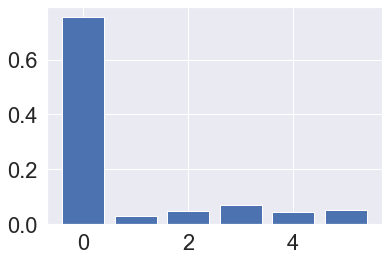

In [148]:

model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

    
# plotting the feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [149]:
X

array([[-0.4628026465686179, 0, True, 1.0, False, False],
       [-0.43971066404556297, 0, True, 2.0, True, False],
       [-0.3627373889687131, 1, True, 1.0, False, False],
       ...,
       [-0.2703694588764933, 1, False, 2.0, False, False],
       [0.17607553656923589, 0, True, 1.0, False, True],
       [-0.37813204398408307, 1, True, 1.0, False, False]], dtype=object)

From the histogram above it can be seen that the most important variable by far, in determining the rating of a restaurant is the *review count* variable. From this analysis it can not be seen whether a high review count leads to a better or worse rating, but is an interesting observation none the less.

# Part 2: Conclusion 

Three classifiers were tested for prediction of rating of restaurants:
- Baseline model (predicting the average rating)
- Logistic regression
- Random Forest 


When looking at accuracy, the baseline model actually performed best which means that none of the classifiers can add any business value in this context. It should be remembered that accuracy is not always a useful metric, especially if the data is very skewed. When looking at the distribution of the star rating for restaurants (seen below) it can seen that it is indeed skewed toward the higher end of the distribution.  

The F1 score - which include both the recall and precision of the classifier - is often a better metric to use. Between the three classifiers the weighted f1 score of the Random Forest classifier performed best.

From the Random Forest classifier it was also concluded that *review count* was the most significant contributer in prediction of the rating. Which might suggest that it is a good idea for a restaurant owner to increase the number of reviews if a higher star rating is sought. 

In general the classifiers were not very good at predicting the rating of a restaurant, which speaks to the fact that many factors - not included in this dataset - play a role in the rating of a restaurant.

**Improvements:**  

One can do cross validation with different hyperparameters for the Random Forest, if further improvements of the classifier is wanted. This will not be done here since the goal of this section is to provide a proof of concept and not model optimization.

Another way improve the prediction accuracies could be to reduce the number of target categories, for example by changing from half star intervals to whole star intervals.

Text(0.5, 1.0, 'Star rating distribution for Restaurants/food')

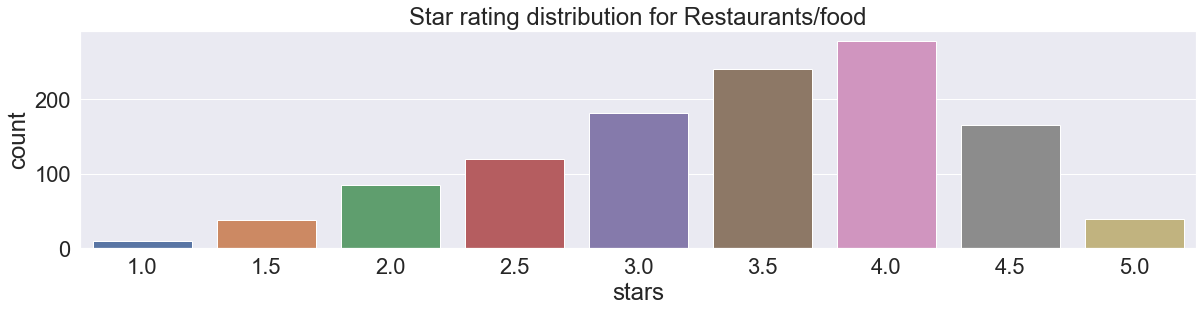

In [119]:
plt.figure(figsize=(20,4))
sns.set(font_scale=2)
sns.countplot(x = 'stars',data = df_rest)
plt.title("Star rating distribution for Restaurants/food")

# Part 3: Prediction of review count
The purpose here is to build and test different regression models that predict the **number of reviews** for restaurants.
This is done using the features: 
- is_open, stars, GoodForKids, RestaurantsPriceRange2, RestaurantsReservations, WiFi

### Preprocessing
The preprocessing procedure here will be very much like the one done for prediction of rating.   

Splitting dataset in features and target

In [120]:
y = df_rest.loc[:, 'review_count']
X = df_rest.drop('review_count',axis=1)

Preprocessing the columns such that they have acceptable values for predictive modelling

In [121]:
X.WiFi.replace({"u'free'": True,"'free'":True,"u'paid'": True, "'paid'": True,"u'no'":False,"'no'":False, "None":False}, inplace=True)
X.GoodForKids.replace({"True":True,"False":False,'None': False}, inplace=True)
X.RestaurantsReservations.replace({'False': False, 'True':True, 'None': False}, inplace=True)
X.RestaurantsPriceRange2.replace({'1':1,'2':2,'3':3,'4':4,'None': 2 }, inplace=True)
        

In [122]:
print("Mean value of the Resturant price range", X.RestaurantsPriceRange2.mean())

Mean value of the Resturant price range 1.545


#### Dealing with NaN values

In [123]:
X.RestaurantsPriceRange2.fillna(2,inplace=True)
X.GoodForKids.fillna(False,inplace=True)
X.WiFi.fillna(False,inplace=True)
X.RestaurantsReservations.fillna(False,inplace=True)

In [124]:
X

,stars,is_open,GoodForKids,RestaurantsPriceRange2,RestaurantsReservations,WiFi
20,3.0,0,True,1.0,False,False
122,4.0,0,True,2.0,True,False
283,1.5,1,True,1.0,False,False
288,3.5,0,True,2.0,True,True
401,4.0,1,False,2.0,False,False
...,...,...,...,...,...,...
208522,3.0,0,True,1.0,False,False
208590,1.5,1,True,1.0,False,False
208605,4.0,1,False,2.0,False,False
209292,2.0,0,True,1.0,False,True


We Standardize the target variable since it has a large spread

In [125]:
y = scale(y)

C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by the scale function.



We have only categorical variables in this dataset

In [126]:
X = X.astype('category')

### Testing Regression models

Split data in train and test set

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# kfold = KFold(n_splits=10, random_state=7)

#### Baseline model
In this model we predict the **mean** review count for restaurants.

In [128]:
y_pred = y_test.mean()*np.ones(len(y_test))
test_err = mean_squared_error(y_test, y_pred)
print("(MSE) Test error: ", test_err)

(MSE) Test error:  0.9149282451289669


#### Linear regression
Linear regression is the simplest regression model, where the prediction of the target values are based on a linear combination of the feature values. 

In [129]:
model = LinearRegression(fit_intercept=True).fit(X_train,y_train)
y_pred = model.predict(X_test)

test_err = mean_squared_error(y_test, y_pred)
print("(MSE) Test error: ", test_err)

(MSE) Test error:  0.6903968729655209


#### RandomForest Regressor
The random forest regressor works the same way as the random forest classifier, the only difference is that it predicts the average prediction of all decision trees.

In [130]:
model = RandomForestRegressor(random_state =2).fit(X_train,y_train)
y_pred = model.predict(X_test)

test_err = mean_squared_error(y_test, y_pred)
print("(MSE) Test error: ", test_err)

(MSE) Test error:  0.66279827699453


C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



#### Feature importance
Post using the Randomforest regressor one can look at the most important features used to do the predictions. This will give us insight into what features are most important for prediction the number of reviews of restaurants.

Feature: 0, Score: 0.28832
Feature: 1, Score: 0.10663
Feature: 2, Score: 0.17421
Feature: 3, Score: 0.13572
Feature: 4, Score: 0.13455
Feature: 5, Score: 0.16056


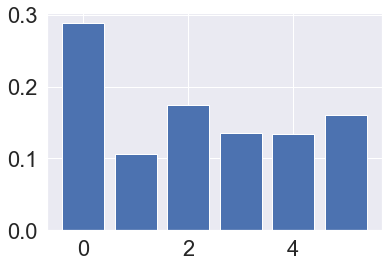

In [131]:
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

    
# plotting the feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

From the histogram above it can be seen that the feature importance is pretty balanced between all features used. With the *star ratin* of the restaurant being the most significant factor in predicting the number of reviews.

# Part 3: Conclusion 

From the three regression models, the Random Forest regressor had the lowest test error, with a mean squared error (MSE) of 0.66.

In the figure below a plot of predicted vs actual values using the Random Forest regressor is shown.
From the plot it is clear that the residuals are very high, and that the model in generel doesn't perform very well.

Intuitively it makes sense that predicting the number of reviews for a restaurant would be a hard thing to do.  
It is therefore hard to say what a restaurant owner should do to increase the number of reviews of their restaurant, on the basis of this analysis.

**Improvements:**  
Again doing some cross validation with some hyperparameters with the random forest regressor could help improve test error.

Another thing could be to change the problem into a classification problem splitting the target into two categories "high" and "low" number of reviews, with arbitrary threshold. This would probably increase the accuracy of the model significantly.

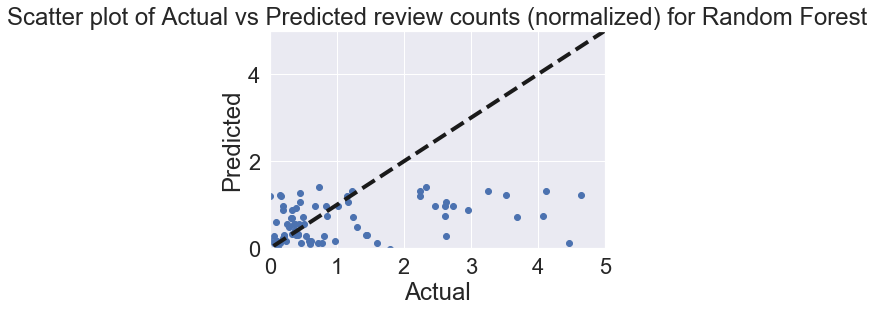

In [132]:

plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim([0, 5])
plt.ylim(0,5)
plt.title("Scatter plot of Actual vs Predicted review counts (normalized) for Random Forest")
plt.show()
